# Combined Visualizations for all models

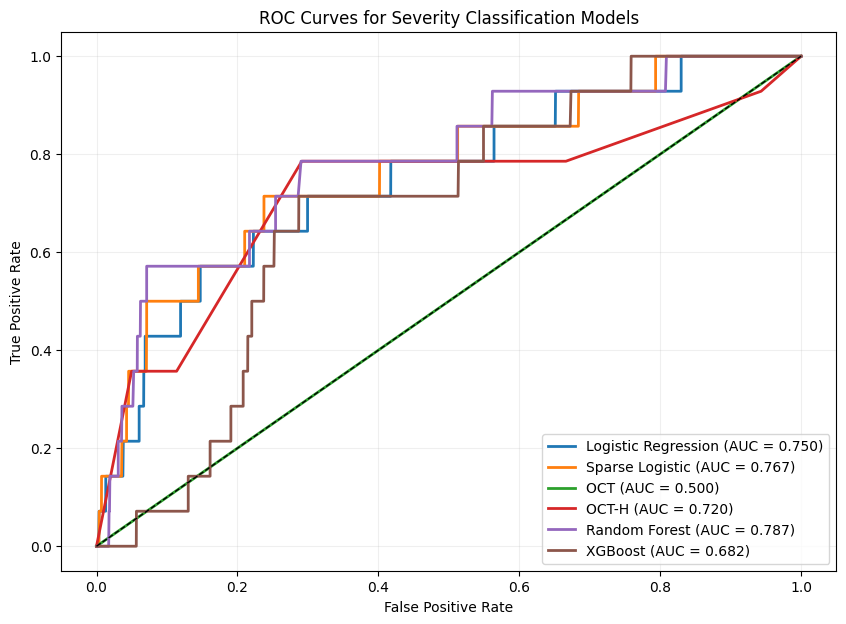

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Load test labels
test_df = pd.read_csv("test_df.csv")
y_test = test_df["HighSeverity"].values
N_TEST = len(y_test)   # should be 5168

def load_yhat_test(path, n_test):
    full = pd.read_csv(path).values.ravel()
    return full[-n_test:]   # last 5168

yhat_logistic = load_yhat_test("logit_y_hat.csv", N_TEST)
yhat_sparse   = load_yhat_test("sparseyhat.csv", N_TEST)
yhat_oct      = load_yhat_test("sparseyhat_octrecall.csv", N_TEST)
yhat_oct_h    = load_yhat_test("sparseyhat_octhrecall.csv", N_TEST)
yhat_rf       = load_yhat_test("sparseyhat_rf.csv", N_TEST)
yhat_xgb      = load_yhat_test("sparseyhat_xg.csv", N_TEST)


models = {
    "Logistic Regression":  yhat_logistic,
    "Sparse Logistic":      yhat_sparse,
    "OCT":                  yhat_oct,
    "OCT-H":                yhat_oct_h,
    "Random Forest":        yhat_rf,
    "XGBoost":              yhat_xgb
}

plt.figure(figsize=(10, 7))

for name, yhat in models.items():
    fpr, tpr, _ = roc_curve(y_test, yhat)
    auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_val:.3f})")
# plot ROC curves

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Severity Classification Models")
plt.legend(loc="lower right")

plt.grid(alpha=0.2)
plt.savefig("figure2_roc_curves.png", dpi=300, bbox_inches='tight')
plt.show()



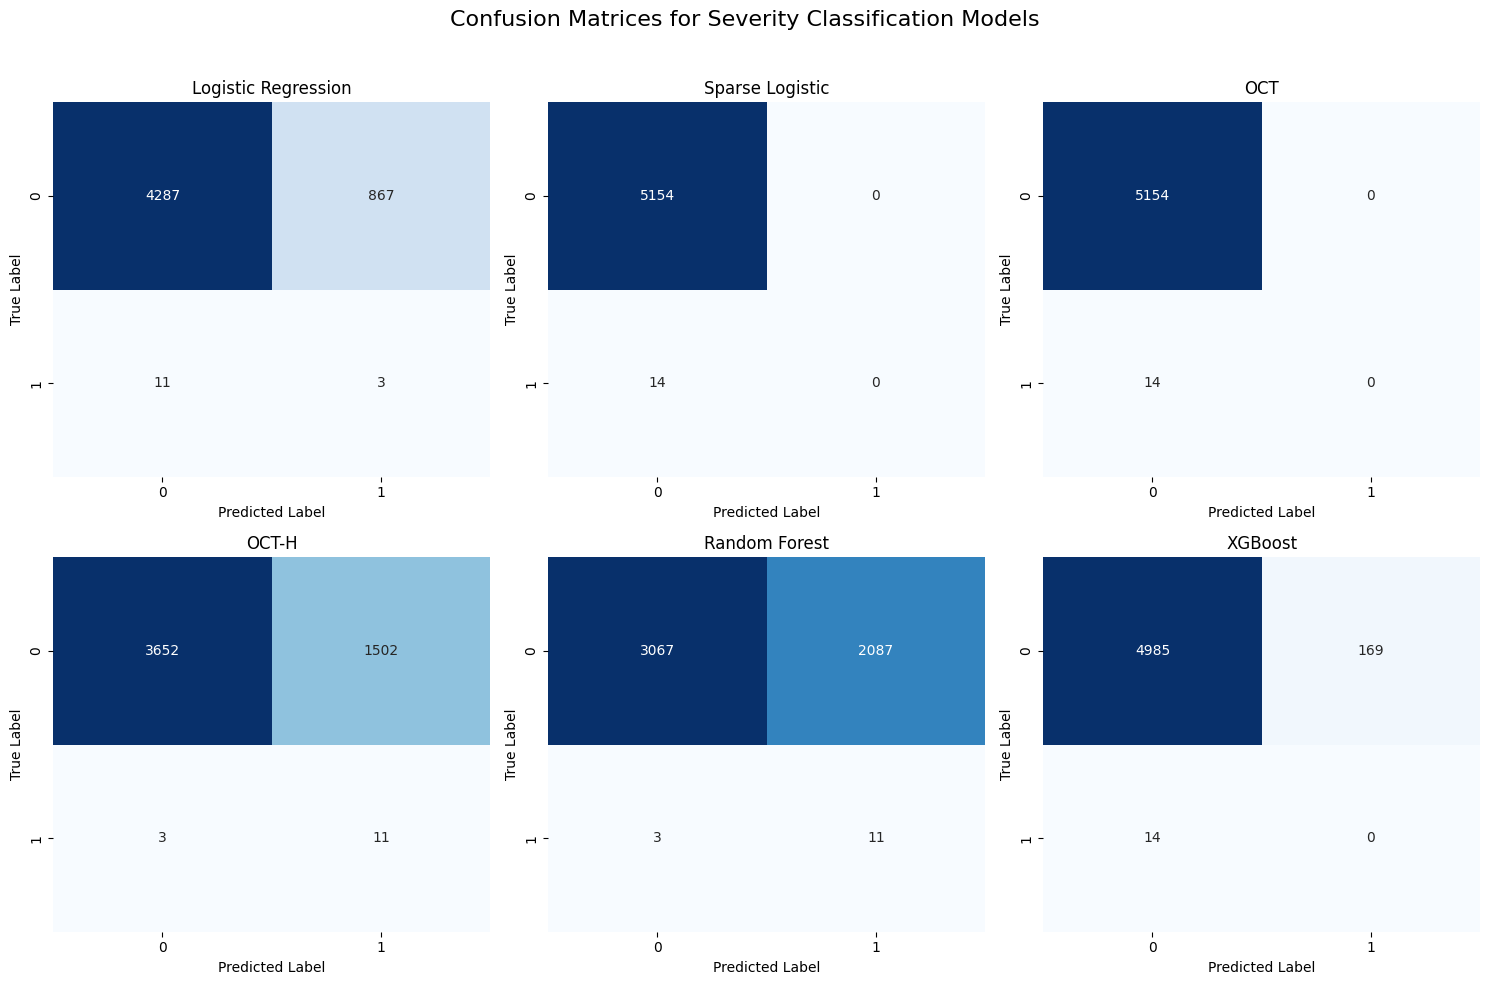

Saved figure3_confusion_matrices.png


In [58]:
# Helper: Convert probabilities to 0/1
def to_labels(p, threshold=0.5):
    return (p >= threshold).astype(int)

# Create confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (name, preds) in zip(axes, model_preds.items()):
    y_pred = to_labels(preds)
    cm = confusion_matrix(y_test, y_pred)
    ax.set_title(name)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        ax=ax
    )

    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.suptitle("Confusion Matrices for Severity Classification Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig("figure3_confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

print("Saved figure3_confusion_matrices.png")


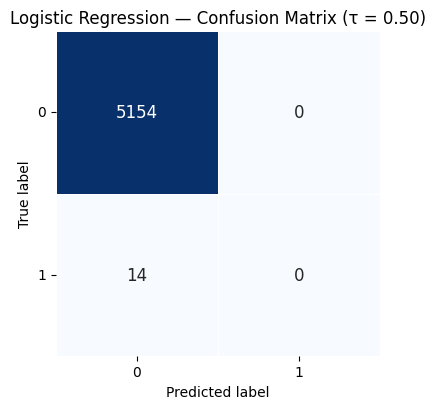

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assumes these already exist:
# y_test -> array of {0,1}
# yhat_logistic -> probabilities P(severity=1)

# Fixed threshold
tau = 0.50
y_pred = (yhat_logistic >= tau).astype(int)

# Confusion matrix (force [0,1] order)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot
fig, ax = plt.subplots(figsize=(4.8, 4.2))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    square=True,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"fontsize": 12},
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1], rotation=0)
ax.set_title("Logistic Regression — Confusion Matrix (τ = 0.50)")
plt.tight_layout()
plt.savefig("logistic.png", dpi=300, bbox_inches="tight")
plt.show()


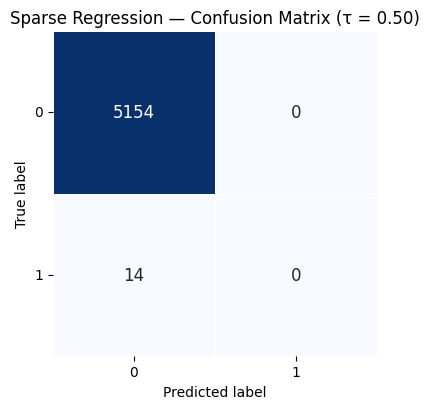

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assumes these already exist:
# y_test -> array of {0,1}
# yhat_logistic -> probabilities P(severity=1)

# Fixed threshold
tau = 0.50
y_pred = (yhat_sparse >= tau).astype(int)

# Confusion matrix (force [0,1] order)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot
fig, ax = plt.subplots(figsize=(4.8, 4.2))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    square=True,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"fontsize": 12},
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1], rotation=0)
ax.set_title("Sparse Regression — Confusion Matrix (τ = 0.50)")
plt.savefig("sparse.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


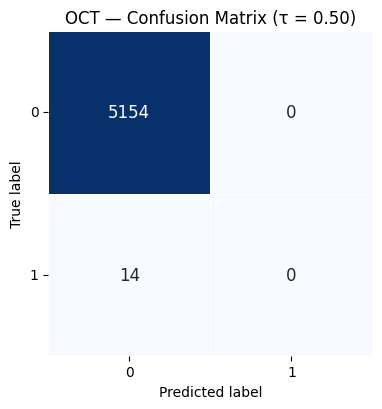

In [69]:
# Fixed threshold
tau = 0.50
y_pred = (yhat_oct >= tau).astype(int)

# Confusion matrix (force [0,1] order)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot
fig, ax = plt.subplots(figsize=(4.8, 4.2))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    square=True,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"fontsize": 12},
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1], rotation=0)
ax.set_title("OCT — Confusion Matrix (τ = 0.50)")
plt.savefig("oct.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

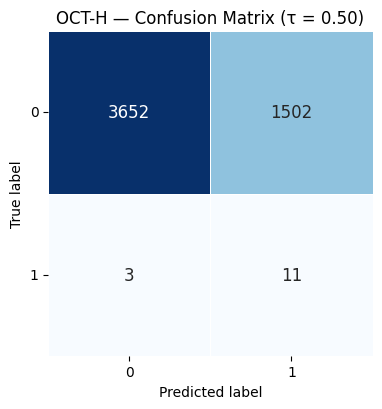

In [70]:
# Fixed threshold
tau = 0.50
y_pred = (yhat_oct_h >= tau).astype(int)

# Confusion matrix (force [0,1] order)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot
fig, ax = plt.subplots(figsize=(4.8, 4.2))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    square=True,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"fontsize": 12},
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1], rotation=0)
ax.set_title("OCT-H — Confusion Matrix (τ = 0.50)")
plt.savefig("octh.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

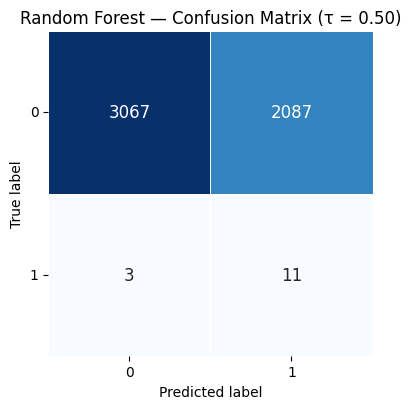

In [71]:
# Fixed threshold
tau = 0.50
y_pred = (yhat_rf >= tau).astype(int)

# Confusion matrix (force [0,1] order)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot
fig, ax = plt.subplots(figsize=(4.8, 4.2))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    square=True,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"fontsize": 12},
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1], rotation=0)
ax.set_title("Random Forest — Confusion Matrix (τ = 0.50)")
plt.savefig("rf.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

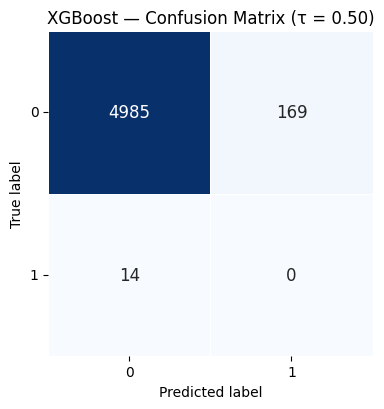

In [72]:
# Fixed threshold
tau = 0.50
y_pred = (yhat_xgb >= tau).astype(int)

# Confusion matrix (force [0,1] order)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot
fig, ax = plt.subplots(figsize=(4.8, 4.2))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    square=True,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"fontsize": 12},
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1], rotation=0)
ax.set_title("XGBoost — Confusion Matrix (τ = 0.50)")
plt.savefig("xgb.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()